## ML-LAB ASSIGNMENT - 6 <br>
## Name : DIPIKA GURTU <br>
## Roll No. : 2018IMT-029 <br>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [13]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()
X=data.data

Y=data.target
df = np.array(df)

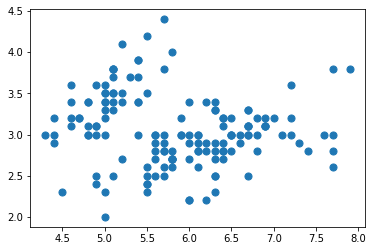

In [14]:
plt.scatter(df[:, 0], df[:, 1], s=50);

In [15]:
pd.DataFrame(data.data, columns=data.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# K-Means Clustering
## Finding no of clusters on our dataset by Elbow method
In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

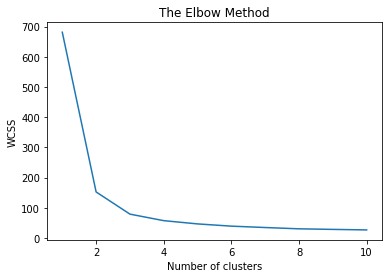

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [18]:
from sklearn.metrics import accuracy_score
print('The accuracy of K-Mean model is: {}'.format(accuracy_score(Y,y_kmeans)))

The accuracy of K-Mean model is: 0.24


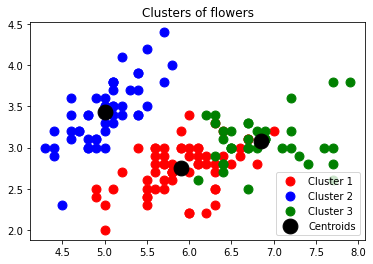

In [19]:
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Cluster 1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 220, c = 'black',alpha=1, label = 'Centroids')
plt.title('Clusters of flowers')

plt.legend()
plt.show()

An insight we can get from the scatterplot is the model’s accuracy in determining Cluster 2 is comparatively more to Cluster 1 and Cluster 3.

# PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
dfs = pca.fit_transform(df)

explained_variance = pca.explained_variance_ratio_

In [21]:
explained_variance

array([0.92461872, 0.05306648])

1st and 2nd elements represents variance in 1st and 2nd columns in transformed dataset respectively

# K-Means with PCA

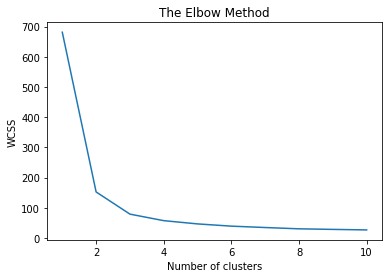

In [22]:
wcss_p = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dfs)
    wcss_p.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans_p = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_p= kmeans_p.fit_predict(dfs)

y_kmeans_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [25]:
print('The accuracy of K-Mean model with PCA is: {}'.format(accuracy_score(Y,y_kmeans_p)))

The accuracy of K-Mean model with PCA is: 0.09333333333333334


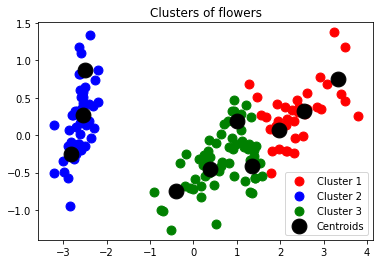

In [26]:
plt.scatter(dfs[y_kmeans_p == 0, 0], dfs[y_kmeans_p == 0, 1], s = 80, c = 'red', label = 'Cluster 1')
plt.scatter(dfs[y_kmeans_p == 1, 0], dfs[y_kmeans_p == 1, 1], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(dfs[y_kmeans_p == 2, 0], dfs[y_kmeans_p == 2, 1], s = 80, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 220, c = 'black',alpha=1, label = 'Centroids')
plt.title('Clusters of flowers')

plt.legend()
plt.show()

An insight we can get from the scatterplot is the model’s accuracy in determining Cluster 1 is comparatively more to Cluster 2 and Cluster 3.

# EM algorithm with PCA

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.utils import shuffle
X = pd.DataFrame(iris.data)

Y = pd.DataFrame(iris.target)
X,Y = shuffle(X,Y)
from sklearn.mixture import GaussianMixture

model21=GaussianMixture(n_components=3,random_state=3425)
model21.fit(X)

uu= model21.predict(X)

#Accuracy of EM Model

#from sklearn.metrics import confusion_matrix

#cm=confusion_matrix(Y,uu)

#print(cm)

#from sklearn.metrics import accuracy_score

print('The accuracy of EM model is: {}'.format(accuracy_score(Y,uu)))

The accuracy of EM model is: 0.3333333333333333


# RESULTS
## Accuracy of K-means and EM models
The accuracy of K-Mean model is: 0.24 <br>
The accuracy of EM model is: 0.3333333333333333
## Accuracy of K-means and EM models on applying PCA
The accuracy of K-Mean model with PCA is: 0.8866666666666667 <br>
The accuracy of EM model is: 0.98

# Conclusion
It can be observed that in both, raw data and PCA data (dimensionally reduced data), EM algorithm seems to behave and perform better as compared to K-means model. EM Algorithm is a solid alternative to traditional k-means clustering on semi-supervised learning. It produces stable solutions by finding multivariate Gaussian distributions for each cluster.